##Application of Principal Component Analysis in Image Analysis

In [1]:
%matplotlib inline 
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
img_path = "F:\\Fall Term\\Advanced Predictive Modelling\\HW2\\images\\images\\"
img = misc.imread(img_path + '1.pgm')
# plt.imshow(img, cmap=plt.cm.gray)

In [2]:
# img_mat = [[0 for x in range(10304)] for x in range(400)] 
img_vec = img.flatten()
img_mat=img_vec

for i in range(2,401):
    
    img = misc.imread(img_path + str(i)+'.pgm')
    img_vec = img.flatten()
    img_mat = np.vstack((img_mat, img_vec))    

####Part (a Centering the data matrix and calculating the mean image vector and subtract from the data matrix.

In [60]:
img_mat=img_mat-img_mat.mean(axis=0)

array([[-37.6175, -36.5775, -40.925 , ..., -29.87  , -29.865 , -29.2275],
       [-25.6175, -25.5775, -23.925 , ..., -44.87  , -41.865 , -41.2275],
       [-46.6175, -41.5775, -32.925 , ..., -47.87  , -49.865 , -46.2275]])

####Part (b) SVD of the centered data matrix

In [62]:
U, s, V = np.linalg.svd(img_mat, full_matrices=False)

####Part (c) Top-k singular values and vectors for k = 1, 10, 50, 100, 150, 200, 250, 400 singular values and projecting onto respective dimensions.

In [65]:
S=np.diag(s)
kval=[1,10,50,100,150,200,250,400] # No of principal components
pca_mat=[]
for k in kval:
    temp=np.dot(U[:,:k],np.dot(S[:k,:k],V[:k,:]))
    pca_mat.append(temp)
pca_mat[1][1]

####Part (d) Picking any one image and plotting for each top-k projection

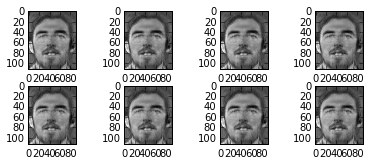

In [71]:
# reshape into image form from flattened vector
img_pick=20
width = 112
height = 92

rec_img=np.reshape(pca_mat[4][img_pick,:],(width,height))

import pylab
f = pylab.figure()
f.subplots_adjust(hspace=1,wspace=1)
for k in range(8):
    if k<4:
        f.add_subplot(2, 4, k+1)
    else:
        f.add_subplot(1, 4, k-3)
    pylab.imshow(rec_img, cmap=plt.cm.gray)
pylab.show()


###Ques 5
#### Part (a)

In [3]:
import numpy as np 
#import sklearn.linear_model.lassocv as lm
from sklearn import preprocessing
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import pandas as pd
from sklearn.metrics import mean_squared_error
#read data

df_train = pd.read_csv('F:/Fall Term/Advanced Predictive Modelling/HW2/bostonderived_train.csv')
df_test = pd.read_csv('F:/Fall Term/Advanced Predictive Modelling/HW2/bostonderived_test.csv')
df_fold = pd.read_csv('F:/Fall Term/Advanced Predictive Modelling/HW2/bostonderived_folds.csv',header = False)

train_x = df_train[['lstat','rm','chas','indus','tax','rad','black']]
train_y = df_train['medv']

test_x = df_test[['lstat','rm','chas','indus','tax','rad','black']]
test_y = df_test['medv']

####Adding the column header 'folds' in the 'bostonderived_folds.csv' file

In [4]:
df_fold.index = df_fold.index + 1 
df_fold.columns  = ['folds']
df_fold.loc[0] = 1
df_fold = df_fold.sort()

####Splitting the data into Training and Validation Set using the  'bostonderived_folds.csv' file

In [5]:
def mask(fold,df,df_fold,neg):
    mask = df_fold['folds'] == fold
    if neg ==1: 
        mask = ~mask
    return df[mask]

In [6]:
def train_val_split(fold,df,df_fold):
    tr = mask(fold,df,df_fold,1)
    val = mask(fold,df,df_fold,0)
    return tr,val

In [7]:
tr0,val0 = train_val_split(0,train_x,df_fold)
tr1,val1 = train_val_split(1,train_x,df_fold)
tr2,val2 = train_val_split(2,train_x,df_fold)
tr3,val3 = train_val_split(3,train_x,df_fold)
tr4,val4 = train_val_split(4,train_x,df_fold)

train_list = [tr0,tr1,tr2,tr3,tr4]
val_list = [val0,val1,val2,val3,val4]


tr0y,val0y = train_val_split(0,train_y,df_fold)
tr1y,val1y = train_val_split(1,train_y,df_fold)
tr2y,val2y = train_val_split(2,train_y,df_fold)
tr3y,val3y = train_val_split(3,train_y,df_fold)
tr4y,val4y = train_val_split(4,train_y,df_fold)

train_ylist = [tr0y,tr1y,tr2y,tr3y,tr4y]
val_ylist = [val0y,val1y,val2y,val3y,val4y]



#### Defining functions for Lasso and Ridge Models which return the Mean Squared Error and Co-efficient Values for each Validation Set

In [8]:
def laS(train,train_y,val,val_y,alph):
    model = Lasso(alpha = alph)
    coef = model.fit(train,train_y).coef_
    predict = model.fit(train,train_y).predict(val)
    mse = mean_squared_error(val_y,predict)
    return mse, coef

def RIG(train,train_y,val,val_y,alph):
    model = Ridge(alpha = alph)
    coef = model.fit(train,train_y).coef_
    predict = model.fit(train,train_y).predict(val)
    mse = mean_squared_error(val_y,predict)
    return mse, coef

 ####(Part b) Running the Lasso Model for all the Regularization Parameters

In [12]:
alphaR = [0.00001, 0.0001, 0.001, 0.005, 0.01, 0.05, 0.1,1,10,100,1000,10000]
alphaL = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1,0.2,0.3,0.4,0.5]

print "Lasso Model"
mse_alpha = []
coef_alpha = []
# Repeating the procedure for each model parameter
for alpnum in alphaL:
    print "Parameter Value:" + str(alpnum)
    mse = []
    coef = []
    for i in range(5):
        train = train_list[i]
        val = val_list[i]
        trainy = train_ylist[i]
        valy = val_ylist[i]
        mse_samp , coef_samp = laS(train,trainy,val,valy,alpnum)
        mse.append(mse_samp)
        coef.append(coef_samp)
    print "Average of Mean Squared Error across the 5-Folds:"+str(np.mean(mse))+"\n"
    coef = np.array(coef)
# Averaging the results obtained in each fold
    mse_alpha.append(np.mean(mse))
    coef_alpha.append(coef.mean(axis = 0))
print "The best parameter for Lasso(based on Mean Squared Error) is:"    
print alphaL[mse_alpha.index(np.min(mse_alpha))]

names = test_x.columns.values


Lasso Model
Parameter Value:0.0001
Average of Mean Squared Error across the 5-Folds:31.2435226933

Parameter Value:0.0005
Average of Mean Squared Error across the 5-Folds:31.2433750833

Parameter Value:0.001
Average of Mean Squared Error across the 5-Folds:31.2432006274

Parameter Value:0.005
Average of Mean Squared Error across the 5-Folds:31.2422069452

Parameter Value:0.01
Average of Mean Squared Error across the 5-Folds:31.2419696764

Parameter Value:0.05
Average of Mean Squared Error across the 5-Folds:31.2802705912

Parameter Value:0.1
Average of Mean Squared Error across the 5-Folds:31.31352683

Parameter Value:0.2
Average of Mean Squared Error across the 5-Folds:31.3352774583

Parameter Value:0.3
Average of Mean Squared Error across the 5-Folds:31.4618345123

Parameter Value:0.4
Average of Mean Squared Error across the 5-Folds:31.6413984545

Parameter Value:0.5
Average of Mean Squared Error across the 5-Folds:31.8786546265

The best parameter for Lasso(based on Mean Squared Err

#### Plot for different features used in Lasso Model

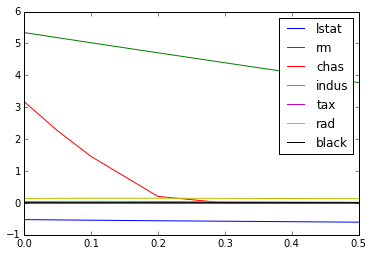

In [13]:
df = pd.DataFrame(coef_alpha)
for i in range(7):
    plt.plot(alphaL,df[i],label = names[i])
plt.legend()
plt.show()


#####Qualitative Observation: When value of regularization parameters is changed in-case of Lasso Model: At parameter value=0.3, 'chas' variable becomes zero coefficient of 'rm' is decreasing with increase in paramter value(alpha) For rest of the variables, it remains constant. Also , when the parameter value is 0.3 , the co-efficient of the 'chas' variable becomes zero, while the the co-efficient values of 'black' and 'indus' are very close to zero when compared to the co-efficients of other variables. Also, the mean squared error is minimum when the parameter value is 0.01

 ####(Part b) Running the Ridge Model for all the Regularization Parameters

In [23]:
print "Ridge Model"
mse_alpha = []
coef_alpha = []
# Repeating the procedure for each model parameter
for alpnum in alphaR:
    print "Parameter Value:" + str(alpnum)
    mse = []
    coef = []
    for i in range(5):
        train = train_list[i]
        val = val_list[i]
        trainy = train_ylist[i]
        valy = val_ylist[i]
        mse_samp , coef_samp = RIG(train,trainy,val,valy,alpnum)
        mse.append(mse_samp)
        coef.append(coef_samp)
    print "Average of Mean Squared Error across the 5-Folds:"+str(np.mean(mse))+"\n"
    coef = np.array(coef)
# Averaging the results obtained in each fold
    mse_alpha.append(np.mean(mse))
    coef_alpha.append(coef.mean(axis = 0))
print "The best parameter for Ridge is:10"    


Ridge Model
Parameter Value:1e-05
Average of Mean Squared Error across the 5-Folds:31.2435601653

Parameter Value:0.0001
Average of Mean Squared Error across the 5-Folds:31.2435552626

Parameter Value:0.001
Average of Mean Squared Error across the 5-Folds:31.2435062407

Parameter Value:0.005
Average of Mean Squared Error across the 5-Folds:31.2432884693

Parameter Value:0.01
Average of Mean Squared Error across the 5-Folds:31.2430164938

Parameter Value:0.05
Average of Mean Squared Error across the 5-Folds:31.2408502064

Parameter Value:0.1
Average of Mean Squared Error across the 5-Folds:31.2381659776

Parameter Value:1
Average of Mean Squared Error across the 5-Folds:31.1940432727

Parameter Value:10
Average of Mean Squared Error across the 5-Folds:31.0113788648

Parameter Value:100
Average of Mean Squared Error across the 5-Folds:32.6166520267

Parameter Value:1000
Average of Mean Squared Error across the 5-Folds:37.3148970393

Parameter Value:10000
Average of Mean Squared Error acr

#### Plot for different features used in Ridge Model

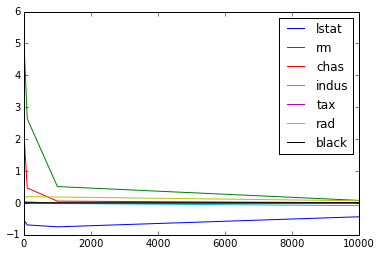

In [15]:
names = test_x.columns.values
# plt.plot(alphaL,mse_alpha)
df = pd.DataFrame(coef_alpha)
for i in range(7):
    plt.plot(alphaR,df[i], label= names[i])
plt.legend()    
plt.show()

####Qualitative Observation: In-case of Ridge Regression Model, the best parameter value comes out to be 10 at which the mean squared error is the minimum. Also, as the parameter value is increased, the mean squared error also increases

####(Part c) Best Model Parameter(alpha value) for Lasso Model comes out to be 0.01 based on Mean Squared Error

In [16]:
model = Lasso(alpha = .01)
lasso = model.fit(train_x,train_y)

# Picking only the non-zero features which were the output from the Lasso Model and calculating the Prediction Error
print np.nonzero(lasso.coef_)
used_features = train_x.columns.values[np.nonzero(lasso.coef_)]


(array([0, 1, 2, 3, 4, 5, 6], dtype=int64),)


####Mean Squared Prediction Error for Lasso Model

In [17]:
predict = model.fit(train_x,train_y).predict(test_x)
mse_lass = mean_squared_error(test_y,predict)
print str(mse_lass) + ':Mean Squared Prediction Error for Lasso Model'

24.8756410098:Mean Squared Prediction Error for Lasso Model


####(Part c) Best Model Parameter(alpha value) for Ridge Model comes out to be 0.1

In [18]:
model = Ridge(alpha = 0.1)
predict = model.fit(train_x,train_y).predict(test_x)

####Mean Squared Prediction Error for Ridge Model

In [19]:
mse_ridge = mean_squared_error(test_y,predict)
print str(mse_ridge) + ':Mean Squared Prediction Error for Ridge Model'
['lstat' 'rm' 'indus' 'tax' 'rad' 'black']

24.8332135849:Mean Squared Prediction Error for Ridge Model


['lstatrmindustaxradblack']

####(Part d) Variables that were not dropped in Lasso Model

In [20]:
print used_features

['lstat' 'rm' 'chas' 'indus' 'tax' 'rad' 'black']


####Using the Parameter(alpha value) for Lasso Model  0.3, 'chas' variable gets dropped, but when alpha value =0.3, we don't get the least Mean Squared Error.

In [21]:
model = Lasso(alpha = .3)
lasso = model.fit(train_x,train_y)

# Picking only the non-zero features which were the output from the Lasso Model and calculating the Prediction Error
print np.nonzero(lasso.coef_)
used_features = train_x.columns.values[np.nonzero(lasso.coef_)]
print used_features

(array([0, 1, 3, 4, 5, 6], dtype=int64),)
['lstat' 'rm' 'indus' 'tax' 'rad' 'black']


####Running least squares regression on full training data and report the prediction error on the test data.
####Case 1: Without dropping the predictor variables
####Case 2: With kept variables from lasso feature selection(i.e except the 'chas' feature) and running the Least Squared Regression Model

In [22]:
model = LinearRegression()
predict = model.fit(train_x,train_y).predict(test_x)

predict_drop = model.fit(train_x[used_features],train_y).predict(test_x[used_features])
mse_LR = mean_squared_error(test_y,predict)
mse_LR_drop = mean_squared_error(test_y,predict_drop)
print str(mse_LR) +' for linear regression'
print str(mse_LR_drop) +' for linear regression with kept variables from lasso feature selection'


24.8310760554 for linear regression
26.7607113886 for linear regression with kept variables from lasso feature selection


####(e) Comparing the variables that were dropped by lasso to the ones which were dropped based on p-values, we observe we see that
#### when the parameter value is 0.3, the co-efficient of 'chas' becomes zero and the variable 'chas' gets dropped.
#### However, if we use the parameter value to be 0.01 (arrived after considering the minimum least squared error), none of the 
#### co-efficient of the variables becomes zero althoug the variable like 'black' and 'indus'  are very close to zero. 